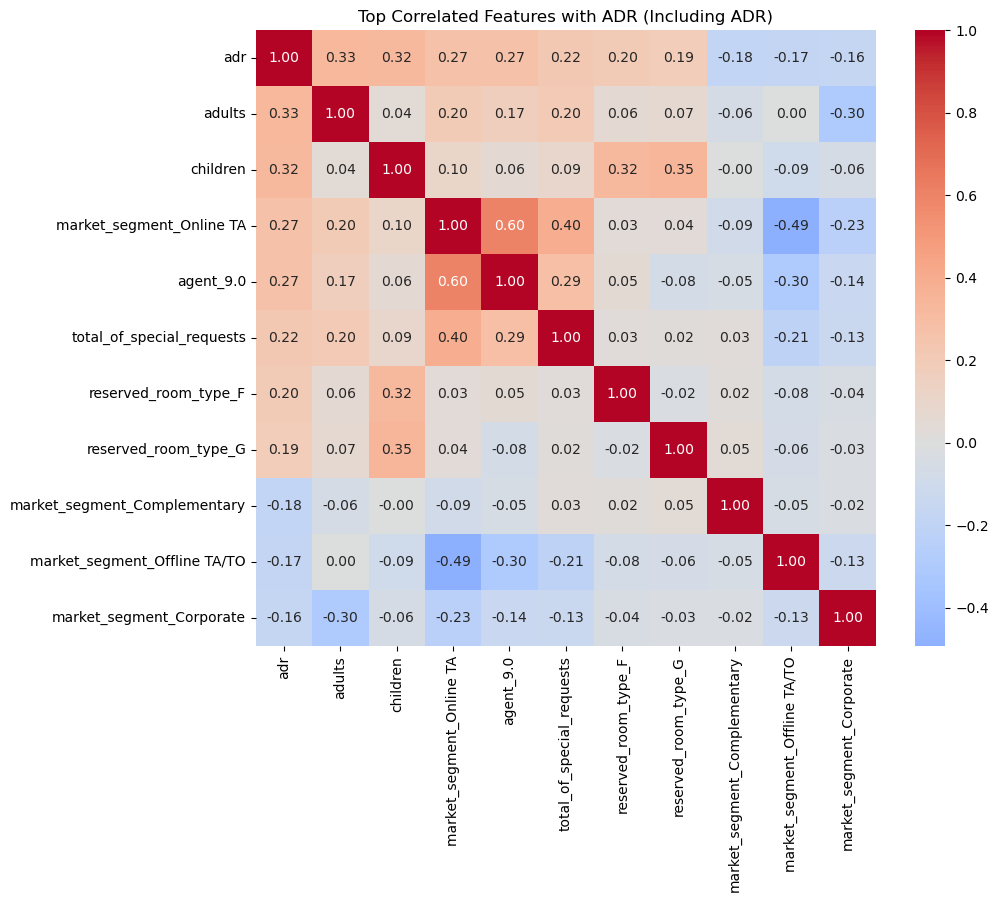

In [9]:
from IPython.display import display, HTML

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

df=pd.read_csv("hotel_bookings.csv")
df["stays_in_total_nights"]=df["stays_in_week_nights"]+df["stays_in_weekend_nights"]


non_canceled_df=df[df["is_canceled"]==0]
canceled_df=df[df["is_canceled"]==1]

adr_df=non_canceled_df[["hotel","lead_time","stays_in_total_nights","adults","children","babies","meal","country","reserved_room_type","deposit_type","agent","market_segment","distribution_channel","customer_type","adr","total_of_special_requests"]]
adr_df_dummy=pd.get_dummies(adr_df,columns=["hotel","meal","country","reserved_room_type","deposit_type","agent","market_segment","distribution_channel","customer_type"],drop_first=True)
adr_correlation_matrix=adr_df_dummy.corr()
adr_correlation=adr_correlation_matrix["adr"]
top_10_features = adr_correlation.abs().sort_values(ascending=False)[1:11].index

top_features_with_target = top_10_features.insert(0, "adr")

top_corr_matrix_with_target = adr_correlation_matrix.loc[top_features_with_target, top_features_with_target]

plt.figure(figsize=(10, 8))
sns.heatmap(top_corr_matrix_with_target, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Top Correlated Features with ADR (Including ADR)")
plt.savefig("adrcorrmatrix.jpg", dpi=300, bbox_inches="tight")
plt.show()